In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
x=611080.3983777018
y=472820.18991934415

In [4]:
import re
import service_api
# from models import Ortofotomapa


URL = "https://mapy.geoportal.gov.pl/wss/service/PZGIK/ORTO/WMS/SkorowidzeWgAktualnosci?"
c = re.compile("\{{1}.*\}{1}")


def getOrtoListbyPoint1992(x,y):
    """Zwraca listę dostępnych do pobrania ortofotomap na podstawie
    zapytania GetFeatureInfo z usługi WMS"""
    LAYERS = [
        'SkorowidzeOrtofotomapyZasiegiStarsze',
        'SkorowidzeOrtofotomapyStarsze',
        'SkorowidzeOrtofotomapyZasiegi2021',
        'SkorowidzeOrtofotomapy2021',
        'SkorowidzeOrtofotomapyZasiegi2022',
        'SkorowidzeOrtofotomapy2022',
        'SkorowidzeOrtofotomapyZasiegi2020',
        'SkorowidzeOrtofotomapy2020'
    ]
    PARAMS = {
        'SERVICE': 'WMS',
        'request': 'GetFeatureInfo',
        'version': '1.3.0',
        'layers': ','.join(LAYERS),
        'styles': '',
        'crs': 'EPSG:2180',
        'bbox': '%f,%f,%f,%f' % (y-500, x-500, y+500, x+500),
        'width': '101',
        'height': '101',
        'format': 'image/png',
        'transparent': 'true',
        'query_layers': ','.join(LAYERS),
        'i': '50',
        'j': '50',
        'INFO_FORMAT': 'text/html'
    }
    resp = service_api.getRequest(params=PARAMS, url=URL)
#     print(resp)
    if resp[0]:
        ortos = c.findall(resp[1])
        ortofotomapaList = []
        for orto in ortos:
            element = orto.strip("{").strip("}").split(',')
            params = {}
            for el in element:
                item = el.strip().split(':')
                val = item[1].strip('"')
                if len(item) > 2:
                    val = ":".join(item[1:]).strip('"')
                params[item[0]] = val
#             print(params)
#             ortofotomapa = Ortofotomapa(**params)
#             ortofotomapaList.append(ortofotomapa)
            ortofotomapaList.append(params)
        return ortofotomapaList
    else:
        return []


In [5]:
res = getOrtoListbyPoint1992(x,y)

In [6]:
res

[{'url': 'https://opendata.geoportal.gov.pl/ortofotomapa/73852/73852_944421_N-34-138-C-a-4-2.tif',
  'godlo': 'N-34-138-C-a-4-2',
  'aktualnosc': '2020-07-24',
  'wielkoscPiksela': '0.25',
  'ukladWspolrzednych': 'PL-1992',
  'calyArkuszWyeplnionyTrescia': 'TAK',
  'modulArchiwizacji': '1:5000',
  'rozmiarPlikuMB': '57',
  'zrodloDanych': 'Zdj. cyfrowe',
  'kolor': 'RGB',
  'numerZgloszeniaPracy': 'DFT.7201.005.2020',
  'aktualnoscRok': '2020'},
 {'url': 'https://opendata.geoportal.gov.pl/ortofotomapa/36/36_21429_N-34-138-C-a-4-2.tif',
  'godlo': 'N-34-138-C-a-4-2',
  'aktualnosc': '2004-01-01',
  'wielkoscPiksela': '0.5',
  'ukladWspolrzednych': 'PL-1992',
  'calyArkuszWyeplnionyTrescia': 'TAK',
  'modulArchiwizacji': '1:5000',
  'rozmiarPlikuMB': '6',
  'zrodloDanych': 'Zdj. analogowe',
  'kolor': 'B/W',
  'numerZgloszeniaPracy': 'N-33-020/04',
  'aktualnoscRok': '2004'},
 {'url': 'https://opendata.geoportal.gov.pl/ortofotomapa/66641/66641_648539_7.171.17.4.tif',
  'godlo': '7.171.17

In [7]:
for i in range(10):
    res = getOrtoListbyPoint1992(x+500*i,y)
    for r in res:
        if int(r['aktualnoscRok'])>=2020:
            print(r['wielkoscPiksela'])
            print(r['zrodloDanych'])
            print(r['kolor'])
            print(r['aktualnosc'])
            print(r['calyArkuszWyeplnionyTrescia'])
            print(r['ukladWspolrzednych'])
            print(r['url'])
            print(r['godlo'])
            print('\n')

0.25
Zdj. cyfrowe
RGB
2020-07-24
TAK
PL-1992
https://opendata.geoportal.gov.pl/ortofotomapa/73852/73852_944421_N-34-138-C-a-4-2.tif
N-34-138-C-a-4-2


0.25
Zdj. cyfrowe
RGB
2020-07-24
TAK
PL-1992
https://opendata.geoportal.gov.pl/ortofotomapa/73852/73852_944603_N-34-138-C-b-3-1.tif
N-34-138-C-b-3-1


0.25
Zdj. cyfrowe
RGB
2020-07-24
TAK
PL-1992
https://opendata.geoportal.gov.pl/ortofotomapa/73852/73852_944603_N-34-138-C-b-3-1.tif
N-34-138-C-b-3-1


0.25
Zdj. cyfrowe
RGB
2020-07-24
TAK
PL-1992
https://opendata.geoportal.gov.pl/ortofotomapa/73852/73852_944603_N-34-138-C-b-3-1.tif
N-34-138-C-b-3-1


0.25
Zdj. cyfrowe
RGB
2020-07-24
TAK
PL-1992
https://opendata.geoportal.gov.pl/ortofotomapa/73852/73852_944603_N-34-138-C-b-3-1.tif
N-34-138-C-b-3-1


0.25
Zdj. cyfrowe
RGB
2020-07-24
TAK
PL-1992
https://opendata.geoportal.gov.pl/ortofotomapa/73852/73852_944605_N-34-138-C-b-3-2.tif
N-34-138-C-b-3-2


0.25
Zdj. cyfrowe
RGB
2020-07-24
TAK
PL-1992
https://opendata.geoportal.gov.pl/ortofotomapa/73

In [8]:
dir(res[0])

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

# geo -> get all points in PL

In [9]:
import geopandas as gpd

In [10]:
from shapely.geometry import Polygon,Point

In [11]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [12]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

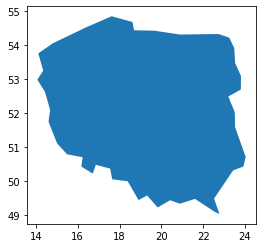

In [13]:
poland = world.loc[world['name'] == 'Poland']
poland.plot()

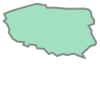

In [14]:
pl = Polygon(poland.geometry.iloc[0])
pl

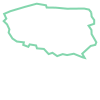

In [15]:
pl.exterior

In [16]:
[len(_) for _ in pl.exterior.xy]

[45, 45]

In [17]:
xys = np.array(pl.exterior.xy)
xys.shape

(2, 45)

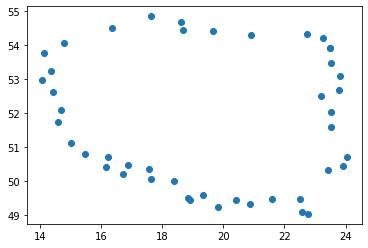

In [18]:
plt.scatter(xys[0,:],xys[1,:])

In [19]:
pl_minx, pl_maxx, pl_miny, pl_maxy = np.min(xys[0]), np.max(xys[0]), np.min(xys[1]), np.max(xys[1])
pl_minx, pl_maxx, pl_miny, pl_maxy

(14.074521111719434, 24.029985792748903, 49.02739533140962, 54.85153595643291)

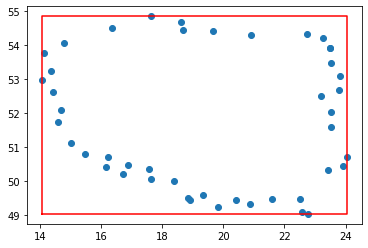

In [20]:
plt.scatter(xys[0,:],xys[1,:])
plt.plot((pl_minx, pl_maxx,pl_maxx,pl_minx,pl_minx),(pl_miny,pl_miny, pl_maxy, pl_maxy,pl_miny),'r')

In [21]:
pl.contains(Point(20,52))

True

In [22]:
pl.contains(Point(20,49))

False

# WGS84 (epsg:4326) -> PL1992 (EPSG:2180)

In [23]:
from pyproj import Proj, transform

In [24]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", 'EPSG:2180')
transformer.transform(52,20)

(459781.1716786437, 568629.1017431414)

In [25]:
xdiff = 0.025
ydiff = 0.015
print(np.array(transformer.transform(52,20)) - np.array(transformer.transform(52-xdiff,20-ydiff)))

xs = np.arange(pl_minx, pl_maxx, xdiff)
ys = np.arange(pl_miny, pl_maxy, ydiff)
xs.shape, ys.shape

[2793.68500614  991.75869334]


((399,), (389,))

In [26]:
cart = np.transpose([np.tile(xs, len(ys)), np.repeat(ys, len(xs))])
cart.shape

(155211, 2)

In [27]:
wgs84s = []
for x,y in tqdm(cart):
    if pl.contains(Point(x,y)):
        wgs84s.append((x,y))
wgs84s = np.array(wgs84s)
wgs84s.shape

100%|██████████| 155211/155211 [00:07<00:00, 20308.52it/s]


(108705, 2)

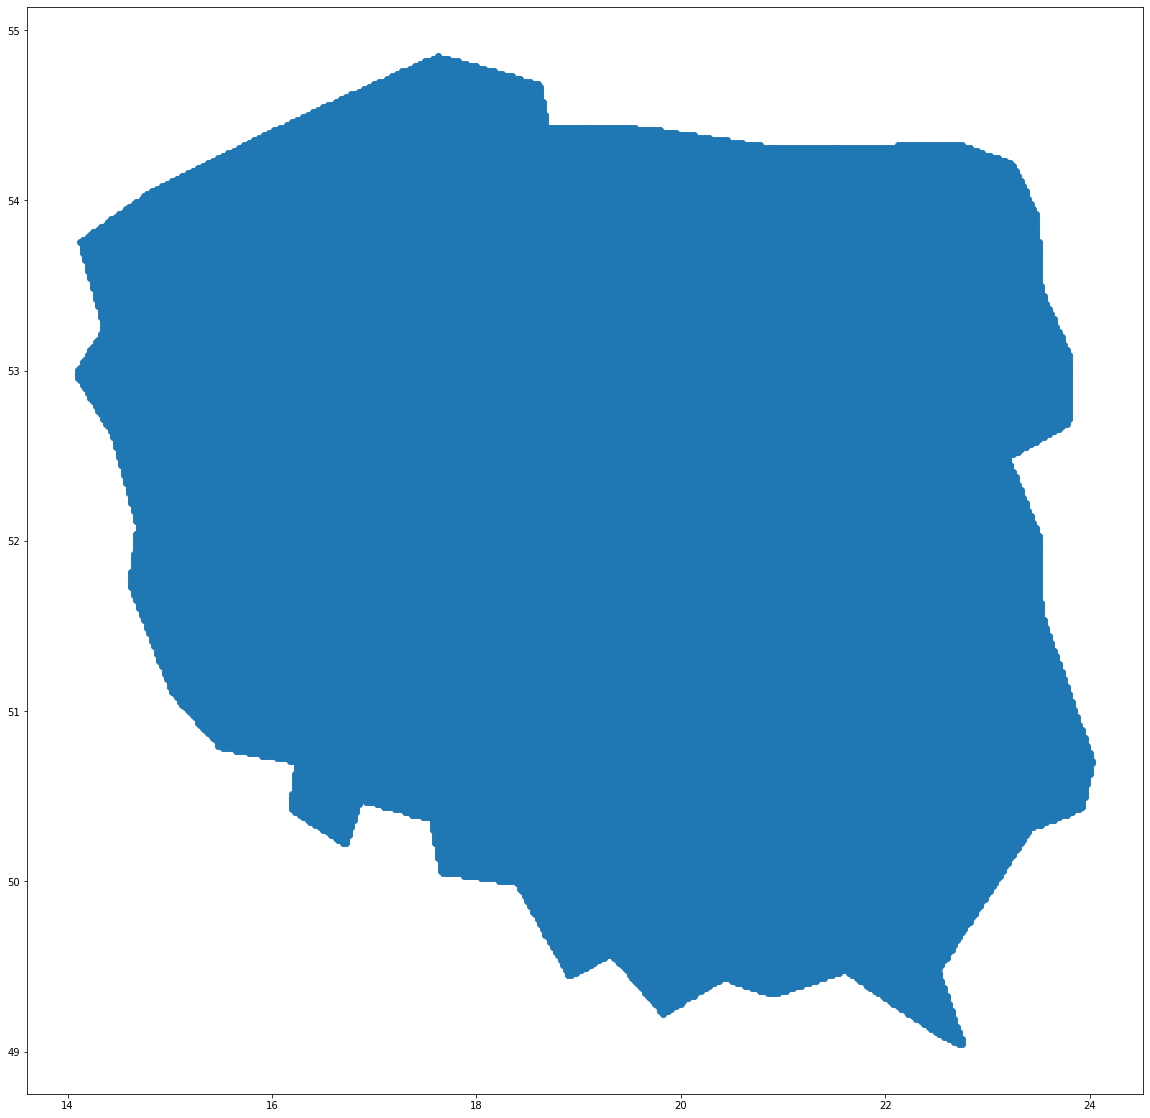

In [28]:
plt.figure(figsize=(20,20))
plt.scatter(wgs84s[:,0],wgs84s[:,1])

# get metadata

In [29]:
import time
from random import shuffle

In [30]:
wgs84s = wgs84s.tolist()
shuffle(wgs84s)

In [31]:
def wrapper(x,y):
    xx,yy = transformer.transform(y, x)
    res = getOrtoListbyPoint1992(xx,yy)
    return x,y,res

In [32]:
import concurrent.futures

In [33]:
metas = dict()
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = []
    for xwgs,ywgs in tqdm(wgs84s):
        futures.append(executor.submit(wrapper, x=xwgs,y=ywgs))
    for future in tqdm(concurrent.futures.as_completed(futures)):
        x,y,res = future.result()
        metas[(x,y)] = res

100%|██████████| 108705/108705 [00:02<00:00, 43104.91it/s]
108705it [59:58, 30.21it/s]


In [69]:
data = []

for i, (k,v) in tqdm(enumerate(metas.items())):
    if len(v) > 0:
        data+=v

108705it [00:00, 958422.72it/s]


In [70]:
len(data)

1067950

In [71]:
import pandas as pd
df = pd.DataFrame.from_dict(data)
df

,url,godlo,aktualnosc,wielkoscPiksela,ukladWspolrzednych,calyArkuszWyeplnionyTrescia,modulArchiwizacji,rozmiarPlikuMB,zrodloDanych,kolor,numerZgloszeniaPracy,aktualnoscRok
0,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-04-27,0.1,PL-1992,TAK,1:5000,274,Zdj. cyfrowe,RGB,GI-FOTO.6201.6.2021,2021
1,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,40,Zdj. cyfrowe,RGB,DFT.7201.030.2021,2021
2,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,41,Zdj. cyfrowe,CIR,DFT.7201.030.2021,2021
3,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2020-04-08,0.25,PL-1992,TAK,1:5000,57,Zdj. cyfrowe,RGB,DFT.7201.014.2020,2020
4,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2004-01-01,0.5,PL-1992,TAK,1:5000,8,Zdj. analogowe,B/W,N-33-020/04,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
1067945,https://opendata.geoportal.gov.pl/ortofotomapa...,5.160.28.1,2010-07-11,0.5,PL-2000:S5,TAK,1:5000,22,Zdj. cyfrowe,RGB,M-33-014/10,2010
1067946,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-20-B-a-1-4,2010-07-11,0.5,PL-1992,TAK,1:5000,11,Zdj. cyfrowe,RGB,M-33-014/10,2010
1067947,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-20-B-a-1-4,2017-06-09,0.25,PL-1992,TAK,1:5000,49,Zdj. cyfrowe,RGB,DFT.7201.005.2017,2017
1067948,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-20-B-a-1-4-4,2019-04-17,0.08,PL-1992,TAK,1:2500,107,Zdj. cyfrowe,RGB,DFT.7201.023.2019,2019


In [72]:
df['fname'] = df.apply(lambda x: x.url.split('/')[-1], axis=1)
df

,url,godlo,aktualnosc,wielkoscPiksela,ukladWspolrzednych,calyArkuszWyeplnionyTrescia,modulArchiwizacji,rozmiarPlikuMB,zrodloDanych,kolor,numerZgloszeniaPracy,aktualnoscRok,fname
0,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-04-27,0.1,PL-1992,TAK,1:5000,274,Zdj. cyfrowe,RGB,GI-FOTO.6201.6.2021,2021,74131_1008462_N-33-132-A-c-4-4.tif
1,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,40,Zdj. cyfrowe,RGB,DFT.7201.030.2021,2021,75112_1063272_N-33-132-A-c-4-4.tif
2,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,41,Zdj. cyfrowe,CIR,DFT.7201.030.2021,2021,75113_1058648_N-33-132-A-c-4-4.tif
3,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2020-04-08,0.25,PL-1992,TAK,1:5000,57,Zdj. cyfrowe,RGB,DFT.7201.014.2020,2020,73555_908802_N-33-132-A-c-4-4.tif
4,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2004-01-01,0.5,PL-1992,TAK,1:5000,8,Zdj. analogowe,B/W,N-33-020/04,2004,35_68701_N-33-132-A-c-4-4.tif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067945,https://opendata.geoportal.gov.pl/ortofotomapa...,5.160.28.1,2010-07-11,0.5,PL-2000:S5,TAK,1:5000,22,Zdj. cyfrowe,RGB,M-33-014/10,2010,66468_586860_5.160.28.1.tif
1067946,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-20-B-a-1-4,2010-07-11,0.5,PL-1992,TAK,1:5000,11,Zdj. cyfrowe,RGB,M-33-014/10,2010,69762_163136_M-33-20-B-a-1-4.tif
1067947,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-20-B-a-1-4,2017-06-09,0.25,PL-1992,TAK,1:5000,49,Zdj. cyfrowe,RGB,DFT.7201.005.2017,2017,66301_544912_M-33-20-B-a-1-4.tif
1067948,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-20-B-a-1-4-4,2019-04-17,0.08,PL-1992,TAK,1:2500,107,Zdj. cyfrowe,RGB,DFT.7201.023.2019,2019,72977_851994_M-33-20-B-a-1-4-4.tif


In [73]:
df = df.drop_duplicates()
df

,url,godlo,aktualnosc,wielkoscPiksela,ukladWspolrzednych,calyArkuszWyeplnionyTrescia,modulArchiwizacji,rozmiarPlikuMB,zrodloDanych,kolor,numerZgloszeniaPracy,aktualnoscRok,fname
0,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-04-27,0.1,PL-1992,TAK,1:5000,274,Zdj. cyfrowe,RGB,GI-FOTO.6201.6.2021,2021,74131_1008462_N-33-132-A-c-4-4.tif
1,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,40,Zdj. cyfrowe,RGB,DFT.7201.030.2021,2021,75112_1063272_N-33-132-A-c-4-4.tif
2,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,41,Zdj. cyfrowe,CIR,DFT.7201.030.2021,2021,75113_1058648_N-33-132-A-c-4-4.tif
3,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2020-04-08,0.25,PL-1992,TAK,1:5000,57,Zdj. cyfrowe,RGB,DFT.7201.014.2020,2020,73555_908802_N-33-132-A-c-4-4.tif
4,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2004-01-01,0.5,PL-1992,TAK,1:5000,8,Zdj. analogowe,B/W,N-33-020/04,2004,35_68701_N-33-132-A-c-4-4.tif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067938,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-11-C-d-1-4-2,2017-09-28,0.07,PL-1992,TAK,1:2500,156,Zdj. cyfrowe,RGB,DFT.7201.045.2017,2017,69892_587616_M-33-11-C-d-1-4-2.tif
1067939,https://opendata.geoportal.gov.pl/ortofotomapa...,6.162.13.15,2017-09-28,0.07,PL-2000:S6,TAK,1:2000,205,Zdj. cyfrowe,RGB,DFT.7201.045.2017,2017,69894_589384_6.162.13.15.tif
1067940,https://opendata.geoportal.gov.pl/ortofotomapa...,6.162.13.15,2017-09-28,0.07,PL-2000:S6,TAK,1:2000,213,Zdj. cyfrowe,CIR,DFT.7201.045.2017,2017,69893_589383_6.162.13.15.tif
1067948,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-20-B-a-1-4-4,2019-04-17,0.08,PL-1992,TAK,1:2500,107,Zdj. cyfrowe,RGB,DFT.7201.023.2019,2019,72977_851994_M-33-20-B-a-1-4-4.tif


In [74]:
df.to_csv("../data/meta/meta.csv", index=False)

In [75]:
df = df[df["ukladWspolrzednych"]=="PL-1992"]
df

,url,godlo,aktualnosc,wielkoscPiksela,ukladWspolrzednych,calyArkuszWyeplnionyTrescia,modulArchiwizacji,rozmiarPlikuMB,zrodloDanych,kolor,numerZgloszeniaPracy,aktualnoscRok,fname
0,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-04-27,0.1,PL-1992,TAK,1:5000,274,Zdj. cyfrowe,RGB,GI-FOTO.6201.6.2021,2021,74131_1008462_N-33-132-A-c-4-4.tif
1,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,40,Zdj. cyfrowe,RGB,DFT.7201.030.2021,2021,75112_1063272_N-33-132-A-c-4-4.tif
2,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2021-08-12,0.25,PL-1992,TAK,1:5000,41,Zdj. cyfrowe,CIR,DFT.7201.030.2021,2021,75113_1058648_N-33-132-A-c-4-4.tif
3,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2020-04-08,0.25,PL-1992,TAK,1:5000,57,Zdj. cyfrowe,RGB,DFT.7201.014.2020,2020,73555_908802_N-33-132-A-c-4-4.tif
4,https://opendata.geoportal.gov.pl/ortofotomapa...,N-33-132-A-c-4-4,2004-01-01,0.5,PL-1992,TAK,1:5000,8,Zdj. analogowe,B/W,N-33-020/04,2004,35_68701_N-33-132-A-c-4-4.tif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067908,https://opendata.geoportal.gov.pl/ortofotomapa...,N-34-98-D-c-1-3,2018-09-17,0.07,PL-1992,TAK,1:5000,763,Zdj. cyfrowe,RGB,DFT.7201.020.2018,2018,71299_809630_N-34-98-D-c-1-3.tif
1067909,https://opendata.geoportal.gov.pl/ortofotomapa...,N-34-98-D-c-1-3,2019-04-07,0.25,PL-1992,TAK,1:5000,34,Zdj. cyfrowe,RGB,DFT.7201.001.2019,2019,72955_837651_N-34-98-D-c-1-3.tif
1067937,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-11-C-d-1-4-2,2017-09-28,0.07,PL-1992,TAK,1:2500,162,Zdj. cyfrowe,CIR,DFT.7201.045.2017,2017,69891_587615_M-33-11-C-d-1-4-2.tif
1067938,https://opendata.geoportal.gov.pl/ortofotomapa...,M-33-11-C-d-1-4-2,2017-09-28,0.07,PL-1992,TAK,1:2500,156,Zdj. cyfrowe,RGB,DFT.7201.045.2017,2017,69892_587616_M-33-11-C-d-1-4-2.tif


In [76]:
df.to_csv("../data/meta/meta-PL-1992.csv", index=False)

In [ ]:
# printed=False
# for xwgs,ywgs in tqdm(wgs84s):
#     if (xwgs,ywgs) in metas:
# #         print(xwgs,ywgs,'skipped')
#         continue
#     x,y = transformer.transform(ywgs, xwgs)
#     res = getOrtoListbyPoint1992(x,y)
#     metas[(xwgs,ywgs)] = res
#     if not printed and len(res)>0:
#         print(res)
#         printed = True
#     time.sleep(0.001)
# len(metas)

In [ ]:
len(metas),len(wgs84s)

# VIZ

In [ ]:
def decode_godlo(godlo):
    g = godlo.split('-')
    mn = g[0]=='M'
    _34 = g[1]=='34'
    _144 = int(g[2])-1
    ABCD = {'A':(0,0),
            'B':(1,0),
            'C':(0,1),
            'D':(1,1)}[g[3]]
    abcd = {'a':(0,0),
            'b':(1,0),
            'c':(0,1),
            'd':(1,1)}[g[4]]
    _1 =  {'1':(0,0),
            '2':(1,0),
            '3':(0,1),
            '4':(1,1)}[g[5]]
    _2 =  {'1':(0,0),
            '2':(1,0),
            '3':(0,1),
            '4':(1,1)}[g[6]]
    
    y12 = _144//12
    x12 = _144 - 12*y12
    
    xx = 16*12*_34  + x12 * 16 + ABCD[0]*8 + abcd[0]*4 + _1[0]*2 + _2[0]
    yy = 16*12*mn + y12 * 16 + ABCD[1]*8 + abcd[1]*4 + _1[1]*2 + _2[1]
    
    
    return xx,yy
    
    


In [ ]:
a = np.zeros((16*12*2,16*12*2))
for m in metas.values():
    for mm in m:
        if int(mm['aktualnoscRok'])>2018 and mm['ukladWspolrzednych']=='PL-1992':
            x,y = decode_godlo(mm['godlo'])
            a[y,x] += 1
plt.figure(figsize=(10,10))
plt.imshow(a,vmin=0,vmax=a.max(), cmap='gray');

In [ ]:
mm

In [ ]:
metas

In [ ]:
godlos=dict()
for m in metas.values():
    for mm in m:
        if int(mm['aktualnoscRok'])>2018 and mm['ukladWspolrzednych']=='PL-1992' and mm['kolor']=='RGB':
            if mm['godlo'] not in godlos:
                godlos[mm['godlo']] = mm
                continue
            if int(godlos[mm['godlo']]['aktualnoscRok']) < int(mm['aktualnoscRok']):
                godlos[mm['godlo']] = mm

In [ ]:
len(godlos)

In [ ]:
for g in godlos:
    print(godlos[g])
    break

In [ ]:
import cv2

In [ ]:
cv2.imwrite('render.png',a)

# the download!

In [ ]:
import os
import urllib.request


In [ ]:
download_dir = '/mnt/nfs/ortofotomapa/images'

In [ ]:
for g in tqdm(list(godlos.keys())):
    fname = download_dir + '/' + godlos[g]['url'].split('/')[-1]
    if not os.path.exists(fname):
        try:
            urllib.request.urlretrieve(godlos[g]['url'], fname)
        except Exception as e:
            print(e)
            print(fname)
            os.remove(fname)
        time.sleep(0.1)


In [ ]:
fname

In [ ]:
def download_wrapper(url, filename):
    try:
#         print(url)
        urllib.request.urlretrieve(url, filename)
        time.sleep(5)
        return (True, filename)
    except Exception as e:
        print(e)
        print(filename)
        time.sleep(60)
        if os.path.exists(filename):
            os.remove(filename)
        return (False, filename)

download_results = []
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
for chunk in tqdm(list(chunks(list(godlos.keys()), 10)),desc='Chunks'):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for g in chunk:
            fname = download_dir + '/' + godlos[g]['url'].split('/')[-1]
            if not os.path.exists(fname):
                futures.append(executor.submit(download_wrapper, url=godlos[g]['url'], filename=fname))
        if len(futures)>0:
            print("tasks:",len(futures))
            for future in tqdm(concurrent.futures.as_completed(futures)):
                download_results.append(future.result())
            time.sleep(10)
